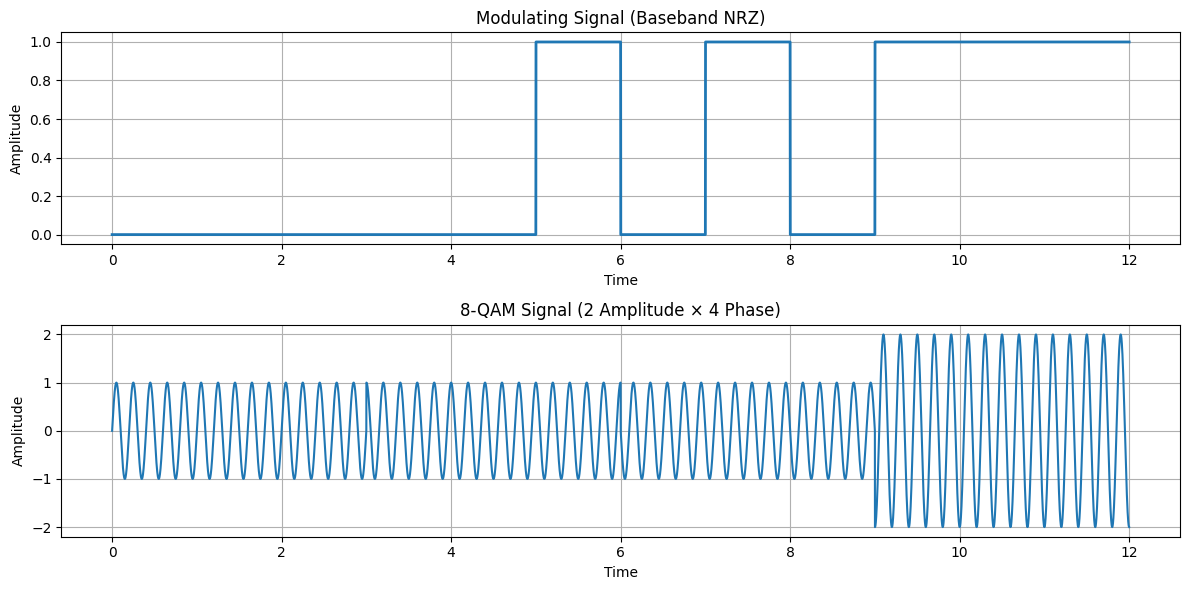

In [9]:
import numpy as np
import matplotlib.pyplot as plt

# -------------------------
# INPUT BIT STREAM
# -------------------------
bits = np.array([0,0,0, 0,0,1, 0,1,0, 1,1,1])  # multiple of 3

# -------------------------
# PARAMETERS
# -------------------------
fc = 5            # Carrier frequency (Hz)
fs = 1000         # Sampling frequency
Tb = 1            # Bit duration
Ts = 3 * Tb       # Symbol duration (3 bits per symbol)

A1 = 1
A2 = 2

# -------------------------
# MODULATING SIGNAL (NRZ)
# -------------------------
samples_per_bit = fs * Tb
modulating_signal = np.repeat(bits, samples_per_bit)
t_msg = np.linspace(0, len(bits)*Tb, len(modulating_signal))

# -------------------------
# 8-QAM MODULATION
# -------------------------
qam_signal = []

samples_per_symbol = 3 * samples_per_bit
t_symbol = np.linspace(0, Ts, samples_per_symbol)

for i in range(0, len(bits), 3):
    amp_bit = bits[i]
    phase_bits = bits[i+1:i+3]

    # Amplitude mapping
    A = A1 if amp_bit == 0 else A2

    # Phase mapping
    if np.array_equal(phase_bits, [0,0]):
        phase = 0
    elif np.array_equal(phase_bits, [0,1]):
        phase = np.pi/2
    elif np.array_equal(phase_bits, [1,0]):
        phase = np.pi
    else:
        phase = 3*np.pi/2

    symbol = A * np.sin(2*np.pi*fc*t_symbol + phase)
    qam_signal.extend(symbol)

qam_signal = np.array(qam_signal)
t_qam = np.linspace(0, len(qam_signal)/fs, len(qam_signal))

# -------------------------
# PLOTTING
# -------------------------
plt.figure(figsize=(12,6))

plt.subplot(2,1,1)
plt.plot(t_msg, modulating_signal, linewidth=2)
plt.title("Modulating Signal (Baseband NRZ)")
plt.xlabel("Time")
plt.ylabel("Amplitude")
plt.grid()

plt.subplot(2,1,2)
plt.plot(t_qam, qam_signal)
plt.title("8-QAM Signal (2 Amplitude × 4 Phase)")
plt.xlabel("Time")
plt.ylabel("Amplitude")
plt.grid()

plt.tight_layout()
plt.show()
